In [95]:
import numpy as np
import pandas as pd 
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [96]:
data = pd.read_csv('Heart.csv')
data.head()
data = data.fillna(data.mean())


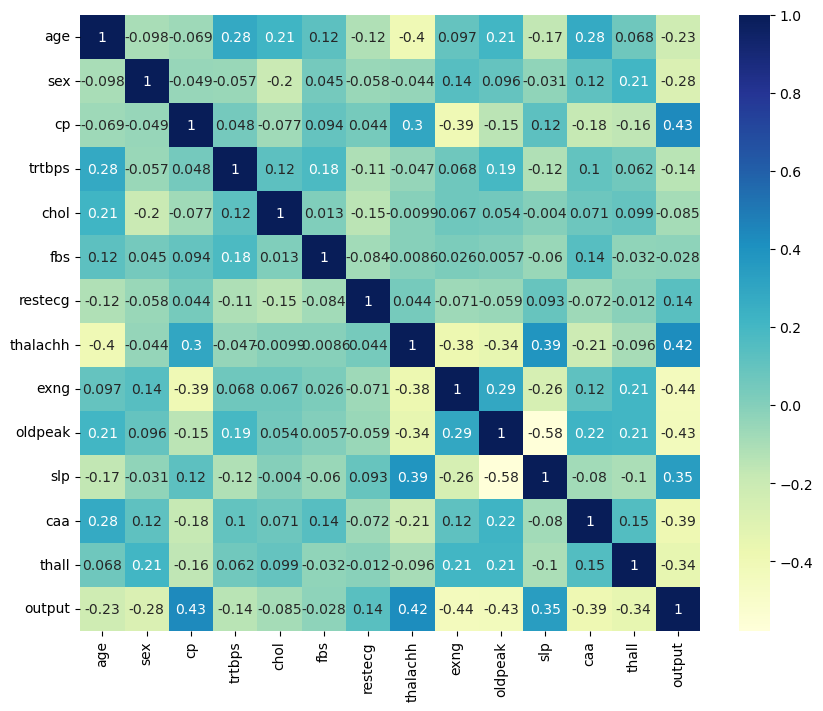

In [97]:
import seaborn as sns

correlation_matrix = data.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='YlGnBu')
plt.show()

In [98]:
data.columns

Index(['age', 'sex', 'cp', 'trtbps', 'chol', 'fbs', 'restecg', 'thalachh',
       'exng', 'oldpeak', 'slp', 'caa', 'thall', 'output'],
      dtype='object')

In [99]:
X = data.drop('output', axis=1)
y = data['output']

In [100]:
X_train, X_test, y_train, y_test = train_test_split( x, y, test_size=0.2, random_state=3)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (242, 10) (242,)
Test set: (61, 10) (61,)


In [101]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [102]:
from sklearn import svm
clfRBF = svm.SVC(kernel='rbf')
clfRBF.fit(X_train, y_train) 
clfSig = svm.SVC(kernel='sigmoid')
clfSig.fit(X_train, y_train) 
clfLin = svm.SVC(kernel='linear')
clfLin.fit(X_train, y_train) 
clfPoly = svm.SVC(kernel='poly' , degree=3)
clfPoly.fit(X_train, y_train) 

SVC(kernel='poly')

In [103]:
from sklearn import metrics
yPredict_rbf = clfRBF.predict(X_test)
yPredict_Sig = clfSig.predict(X_test)
yPredict_linear = clfLin.predict(X_test)
yPredict_poly = clfPoly.predict(X_test)

print("acc rbf: ", metrics.accuracy_score(y_test , yPredict_rbf))
print("acc Sig: ", metrics.accuracy_score(y_test , yPredict_Sig))
print("acc linear: ", metrics.accuracy_score(y_test , yPredict_linear))
print("acc poly: ", metrics.accuracy_score(y_test , yPredict_poly))

acc rbf:  0.8688524590163934
acc Sig:  0.7868852459016393
acc linear:  0.7868852459016393
acc poly:  0.8032786885245902


              precision    recall  f1-score   support

           0       0.93      0.67      0.78        21
           1       0.85      0.97      0.91        40

    accuracy                           0.87        61
   macro avg       0.89      0.82      0.84        61
weighted avg       0.88      0.87      0.86        61

Confusion matrix, without normalization
[[14  7]
 [ 1 39]]


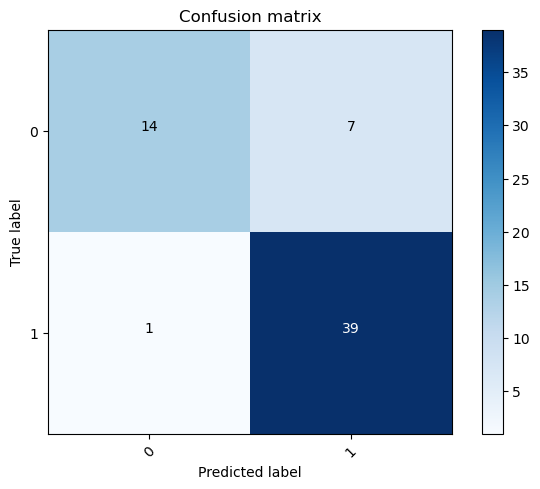

In [105]:
from sklearn.metrics import classification_report, confusion_matrix
import itertools
def plot_confusion_matrix(cm, classes,normalize=False,title='Confusion matrix', cmap=plt.cm.Blues):
 
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')


cnf_matrix = confusion_matrix(y_test, yPredict_rbf, labels=[0,1])
np.set_printoptions(precision=2)
print (classification_report(y_test, yPredict_rbf))
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['0','1'] , normalize= False,  title='Confusion matrix')

***RBF***